In [1]:
import numpy as np
import matplotlib.pyplot as plt

# **Remarks**

***Name:*** Yashaswi Sharma

***UID:*** 116245821

***Link To File:*** **https://colab.research.google.com/drive/1KAJ9852efG1eWNIFeVAOP2zfYml2tW7j?usp=sharing**

I am sharing this file because at times google colab has image formatting issues. Hence, with access to this link if there are any images that are misplaced or half presented, the grader will have full and ready access to the actual image.

# **Rank the Teams**

## 1)  The teams need to be ranked from first to fourth. Use the Massey method

Tournament Final Scores:

{{"A", "B"} -> 46, {"A", "C"} -> 1, {"A", "D"} -> 47, {"B", "C"} -> -23, {"B", "D"} -> 24, {"C", "D"} -> -37}


Below are the **original** scores vector and teams matrix

In [10]:
score = np.array([46,1,47,-23,24,-37]) # will act as our "b" vector
teams = np.array([[1,-1,0,0], [1,0,-1,0], [1,0,0,-1], [0,1,-1,0], [0,1,0,-1], [0,0,1,-1]])
print('scores: {}'.format(score))
print('------------------')
print(teams)

scores: [ 46   1  47 -23  24 -37]
------------------
[[ 1 -1  0  0]
 [ 1  0 -1  0]
 [ 1  0  0 -1]
 [ 0  1 -1  0]
 [ 0  1  0 -1]
 [ 0  0  1 -1]]


Now we will modify them to apply the **Massey** method

In [22]:
teamta = teams.T.dot(teams)
score_new = teams.T.dot(score)
teamta[3,:] = 1
score_new[3] = 0
print(teamta)
print(score_new)

[[ 3 -1 -1 -1]
 [-1  3 -1 -1]
 [-1 -1  3 -1]
 [ 1  1  1  1]]
[ 94 -45 -15   0]


In [23]:
solu = np.linalg.inv(teamta).dot(score_new)
print(solu)

[ 23.5  -11.25  -3.75  -8.5 ]


***Final Ranking of Teams:***

1. Team A
2. Team C
3. Team D
4. Team B

# **Predict the Last Game**

## 2)  Teams C and D are going to play one more game next Friday. The committee will make a new ranking by including this game in the ranking calculation.  Assume the point difference can range from -50 to +50, as measured in C's favor.

### a)  Based on your answer to the previous question, who is predicted to win C or D?



***Answer:*** By earlier order, **Team C** is predicted to win as it has a higher rank *when compared to* Team D.

### b)  What is the predicted point difference?

In [25]:
solu[2] - solu[1]

7.5

***Answer:*** The point difference is expected to be about 7.5 points.

# **Analyze the possible outcomes of the last game**

## 3)  Answer these questions about how can this game between C and D can affect the rankings.

### a)    What is the point range where the ranking from the previous question is unchanged?



In [46]:
# NOTE THE LAST VALUE IN SCORE => REFERS TO THE LOWER END OF WHAT THE POINT DIFF
# CAN BE S.T. THE OVERALL RANKINGS DO NOT CHANGE => IF CHANGE TO LOWER NUMBER 
# WILL CHANGE RANKINGS
score = np.array([46,1,47,-23,24,-37, -9]) 
teams = np.array([[1,-1,0,0], [1,0,-1,0], [1,0,0,-1], [0,1,-1,0], [0,1,0,-1], 
                  [0,0,1,-1], [0,0,1,-1]])
teamta = teams.T.dot(teams)
score_new = teams.T.dot(score)
teamta[3,:] = 1
score_new[3] = 0
solu = np.linalg.inv(teamta).dot(score_new)
solulst = list(solu)
names = ['A', 'B', 'C', 'D']
while len(solulst) > 0:
  max_ele = max(solulst)
  solulst.remove(max_ele)
  count = 1
  for val in solu:
    if max_ele == val:
      break
    count += 1
  print('Rank {}: Team {}'.format(len(solu) - len(solulst), names[count-1]))

Rank 1: Team A
Rank 2: Team C
Rank 3: Team D
Rank 4: Team B


In [52]:
# NOTE THE LAST VALUE IN SCORE => REFERS TO THE UPPER END OF WHAT THE POINT DIFF
# CAN BE S.T. THE OVERALL RANKINGS DO NOT CHANGE => IF CHANGE TO HIGHER NUMBER 
# WILL CHANGE RANKINGS
score = np.array([46,1,47,-23,24,-37, 21]) 
teams = np.array([[1,-1,0,0], [1,0,-1,0], [1,0,0,-1], [0,1,-1,0], [0,1,0,-1], 
                  [0,0,1,-1], [0,0,1,-1]])
teamta = teams.T.dot(teams)
score_new = teams.T.dot(score)
teamta[3,:] = 1
score_new[3] = 0
solu = np.linalg.inv(teamta).dot(score_new)
solulst = list(solu)
names = ['A', 'B', 'C', 'D']
while len(solulst) > 0:
  max_ele = max(solulst)
  solulst.remove(max_ele)
  count = 1
  for val in solu:
    if max_ele == val:
      break
    count += 1
  print('Rank {}: Team {}'.format(len(solu) - len(solulst), names[count-1]))

Rank 1: Team A
Rank 2: Team C
Rank 3: Team D
Rank 4: Team B


As you can see above, the finalised range for where the **point difference** can lie in this final game between **Team C** & **Team D** s.t. the original rankings *DO NOT* change is: 

$\textbf{[-9,21]}$

### b)   What is one final ranking which cannot result from this final game?

In [61]:
for i in range(-50,60,10):
  print('Rankings with point diff {}'.format(i))
  score = np.array([46,1,47,-23,24,-37, i]) 
  teams = np.array([[1,-1,0,0], [1,0,-1,0], [1,0,0,-1], [0,1,-1,0], [0,1,0,-1], 
                  [0,0,1,-1], [0,0,1,-1]])
  teamta = teams.T.dot(teams)
  score_new = teams.T.dot(score)
  teamta[3,:] = 1
  score_new[3] = 0
  solu = np.linalg.inv(teamta).dot(score_new)
  solulst = list(solu)
  names = ['A', 'B', 'C', 'D']
  while len(solulst) > 0:
    max_ele = max(solulst)
    solulst.remove(max_ele)
    count = 1
    for val in solu:
      if max_ele == val:
        break
      count += 1
    print('Rank {}: Team {}'.format(len(solu) - len(solulst), names[count-1]))
  print('------------------------------------------------')

Rankings with point diff -50
Rank 1: Team A
Rank 2: Team D
Rank 3: Team B
Rank 4: Team C
------------------------------------------------
Rankings with point diff -40
Rank 1: Team A
Rank 2: Team D
Rank 3: Team C
Rank 4: Team B
------------------------------------------------
Rankings with point diff -30
Rank 1: Team A
Rank 2: Team D
Rank 3: Team C
Rank 4: Team B
------------------------------------------------
Rankings with point diff -20
Rank 1: Team A
Rank 2: Team D
Rank 3: Team C
Rank 4: Team B
------------------------------------------------
Rankings with point diff -10
Rank 1: Team A
Rank 2: Team D
Rank 3: Team C
Rank 4: Team B
------------------------------------------------
Rankings with point diff 0
Rank 1: Team A
Rank 2: Team C
Rank 3: Team D
Rank 4: Team B
------------------------------------------------
Rankings with point diff 10
Rank 1: Team A
Rank 2: Team C
Rank 3: Team D
Rank 4: Team B
------------------------------------------------
Rankings with point diff 20
Rank 1: T

As you can see from above, it is impossible, regardless of the result of the game between **Team C** & **Team D**, for **Team A** to be knocked off first place. 

Hence the following ranking is **IMPOSSIBLE** to achieve:

1. Team C
2. Team D 
3. Team B
4. Team A

### c)   What are the possible new rankings after the last game?  For each ranking give the point range which gives that ranking.  Make a visualization that shows the possibilities.

In [91]:
rank_ord = []
rank_score = []
for i in range(-50,51):
  score = np.array([46,1,47,-23,24,-37, i]) 
  teams = np.array([[1,-1,0,0], [1,0,-1,0], [1,0,0,-1], [0,1,-1,0], [0,1,0,-1], 
                  [0,0,1,-1], [0,0,1,-1]])
  teamta = teams.T.dot(teams)
  score_new = teams.T.dot(score)
  teamta[3,:] = 1
  score_new[3] = 0
  solu = np.linalg.inv(teamta).dot(score_new)
  solulst = list(enumerate(solu))
  solulst = sorted(solulst, key=lambda x:x[1])
  rank_score.append(solu)
  rank_ord.append([solulst[i][0] for i in range(len(solulst) - 1, -1, -1)])

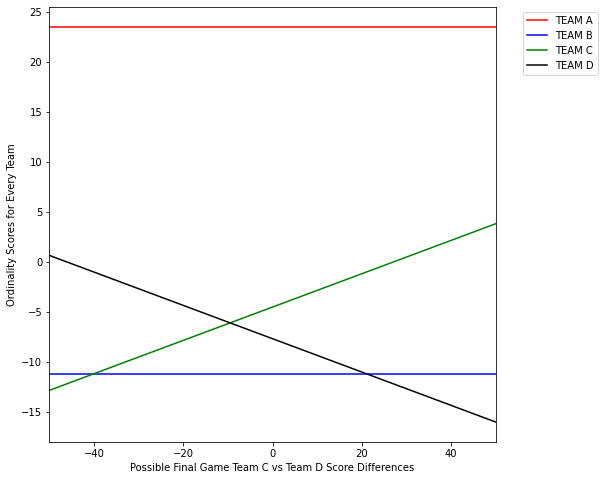

In [94]:
rank_score = np.array(rank_score)
plt.figure(figsize=(8,8))
plt.xlabel('Possible Final Game Team C vs Team D Score Differences')
plt.xlim(-50,50)
plt.ylabel('Ordinality Scores for Every Team')
plt.plot(list(range(-50,51)), rank_score[:,0], label='TEAM A',color='red')
plt.plot(list(range(-50,51)), rank_score[:,1], label='TEAM B', color='blue')
plt.plot(list(range(-50,51)), rank_score[:,2], label='TEAM C', color='green')
plt.plot(list(range(-50,51)), rank_score[:,3], label='TEAM D', color='black')
plt.legend(bbox_to_anchor=(1.05,1))
plt.show()

As we can see above, there are 3 intersections that occur in the graph, hence there are 4 sets of final team ranking possibilities. Those rankings and the required score differential are listed below (score differential derived from Team C vs Team D)

***Range:*** $[-50,-41]$

***Rankings:***
1. Team A
2. Team D
3. Team B
4. Team C

***Range:*** $[-40,-10]$

***Rankings:***
1. Team A
2. Team D
3. Team C
4. Team B

***Range:*** $[-9, 21]$

***Rankings:***
1. Team A
2. Team C
3. Team D
4. Team B

***Range:*** $[22, 50]$

***Rankings:***
1. Team A
2. Team C
3. Team B
4. Team D


Further code is provided below to validate these rankings. 0 = Team A, 1 = Team B and so on.

In [93]:
for i in range(len(rank_ord)):
  if i < 100 and rank_ord[i] != rank_ord[i+1]:
    print('Change up right after Score Differential: {}'.format(i-50))
    print(rank_ord[i])
    print(rank_ord[i+1])

Change up right after Score Differential: -41
[0, 3, 1, 2]
[0, 3, 2, 1]
Change up right after Score Differential: -10
[0, 3, 2, 1]
[0, 2, 3, 1]
Change up right after Score Differential: 21
[0, 2, 3, 1]
[0, 2, 1, 3]
